In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df=pd.read_csv('Data/diabetic_data_original.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [179]:
df.shape

(101766, 50)

In [180]:
df.iloc[:,0:19].head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648


In [181]:
df.iloc[:,19:30].head(3)

,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide
0,?,?,1,NaN,NaN,No,No,No,No,No,No
1,250.01,255,9,NaN,NaN,No,No,No,No,No,No
2,250,V27,6,NaN,NaN,No,No,No,No,No,No


In [182]:
df.iloc[:,30:51].head(3)

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [183]:
med_columns = ['metformin', 'insulin', 'glipizide', 'glyburide', 'repaglinide', 
               'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
               'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 
               'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 
               'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

df['medications'] = df[med_columns].apply(lambda row: ', '.join([col for col in med_columns if row[col] != 'No']) if any(row[col] != 'No' for col in med_columns) else 'None', 
    axis=1)

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,medications
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,None
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,insulin
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,glipizide
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,"insulin, glipizide"


In [184]:
df.drop(columns=med_columns,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [185]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,tolbutamide,change,diabetesMed,readmitted,medications
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,?,?,1,NaN,NaN,No,No,No,NO,None
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,250.01,255,9,NaN,NaN,No,Ch,Yes,>30,insulin
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,250,V27,6,NaN,NaN,No,No,Yes,NO,glipizide
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,250.43,403,7,NaN,NaN,No,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,157,250,5,NaN,NaN,No,Ch,Yes,NO,"insulin, glipizide"


In [186]:
df.isin(['?']).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
tolbutamide                     0
change                          0
diabetesMed                     0
readmitted                      0
medications                     0
dtype: int64

In [187]:
df.replace('?',np.nan,inplace=True)

In [188]:
df.isin(['?']).sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
tolbutamide                 0
change                      0
diabetesMed                 0
readmitted                  0
medications                 0
dtype: int64

In [189]:
df.drop(columns=['encounter_id','patient_nbr','payer_code'],inplace=True)
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,tolbutamide,change,diabetesMed,readmitted,medications
0,Caucasian,Female,[0-10),NaN,6,25,1,1,Pediatrics-Endocrinology,41,...,NaN,NaN,1,NaN,NaN,No,No,No,NO,None
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,59,...,250.01,255,9,NaN,NaN,No,Ch,Yes,>30,insulin
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,11,...,250,V27,6,NaN,NaN,No,No,Yes,NO,glipizide
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,44,...,250.43,403,7,NaN,NaN,No,Ch,Yes,NO,insulin
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,51,...,157,250,5,NaN,NaN,No,Ch,Yes,NO,"insulin, glipizide"


In [190]:

def nullvalues(data):
    columns = data.columns.tolist()
    return {col : data[col].isnull().sum() for col in columns if data[col].isnull().sum() > 0}
null_dict = nullvalues(df)

print(null_dict)

null_df = pd.Series(null_dict).to_frame().reset_index().rename(columns={0:'Null_values'})

{'race': np.int64(2273), 'weight': np.int64(98569), 'medical_specialty': np.int64(49949), 'diag_1': np.int64(21), 'diag_2': np.int64(358), 'diag_3': np.int64(1423), 'max_glu_serum': np.int64(96420), 'A1Cresult': np.int64(84748)}


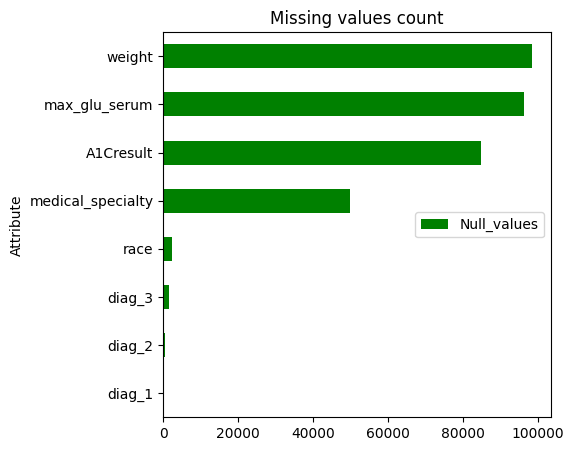

In [191]:
null_df.sort_values(by=['Null_values'],ascending=True).set_index('index').plot(kind='barh'
                                                                               ,color='green',
                                                                              figsize=(5,5))
plt.title("Missing values count")
plt.ylabel("Attribute")
plt.legend(loc='center right')
plt.show()

In [192]:
def Description(data):
    """return dataframe of describing all Attributes
    """
    data_dict = {'Attribute' : data.columns,
                 'Data_type' : [data[column].dtype.name for column in data.columns],
                 'Total_Entries' : [data.shape[0]]*len(data.columns),
                 'Null_values' : data.isnull().sum().values,
                 'Percent_Null_values' : (data.isnull().mean().round(4) * 100).values,
                 'Unique_values' : data.nunique().values} 
    data_details = pd.DataFrame(data_dict)
    return data_details
data_desc = Description(df)

data_desc.sort_values(by=['Percent_Null_values'],ascending=False,ignore_index=True).head(5)

,Attribute,Data_type,Total_Entries,Null_values,Percent_Null_values,Unique_values
0,weight,object,101766,98569,96.86,9
1,max_glu_serum,object,101766,96420,94.75,3
2,A1Cresult,object,101766,84748,83.28,3
3,medical_specialty,object,101766,49949,49.08,72
4,race,object,101766,2273,2.23,5


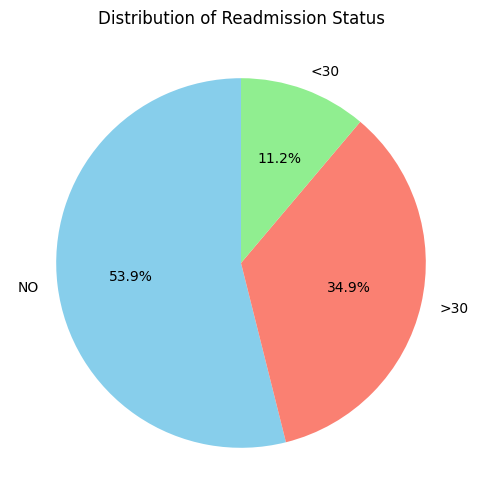

In [193]:
readmitted_counts = df['readmitted'].value_counts()
readmitted_percentage = readmitted_counts / len(df) * 100
plt.figure(figsize=(8,6))
plt.pie(readmitted_counts, labels=readmitted_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'], startangle=90)
plt.title('Distribution of Readmission Status')
plt.show()

In [194]:
df['readmitted'] = df['readmitted'].map({'<30':'Yes','>30':'No','NO':'No'})

In [195]:
(df['readmitted'].value_counts(normalize=True)*100).round(2)

readmitted
No     88.84
Yes    11.16
Name: proportion, dtype: float64

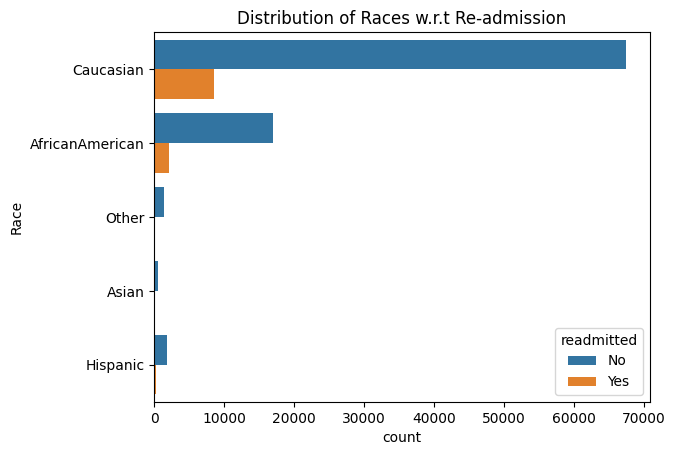

In [196]:
sns.countplot(y = df['race'],hue=df['readmitted'])
plt.title("Distribution of Races w.r.t Re-admission")
plt.ylabel("Race")
plt.show()


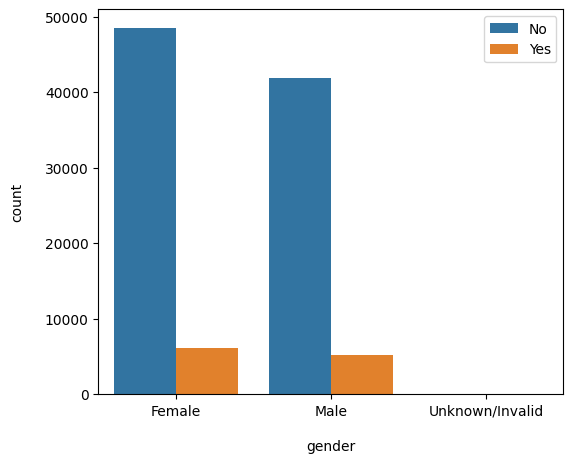

In [197]:
fig,ax = plt.subplots(figsize=(6,5))
sns.countplot(data=df,x='gender',hue=df['readmitted'])
plt.xlabel("gender",labelpad=15.0)
plt.ylabel("count",labelpad=15.0)
plt.legend(loc='upper right')
plt.show()

In [198]:
df['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [199]:
df[df['gender']=='Unknown/Invalid']

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,tolbutamide,change,diabetesMed,readmitted,medications
30506,Other,Unknown/Invalid,[70-80),NaN,3,1,1,1,Cardiology,5,...,411,401,4,NaN,NaN,No,Ch,Yes,No,"glipizide, pioglitazone"
75551,NaN,Unknown/Invalid,[60-70),NaN,1,1,7,1,NaN,38,...,873,E813,5,NaN,NaN,No,No,No,No,None
82573,NaN,Unknown/Invalid,[70-80),NaN,1,22,7,8,NaN,59,...,805,808,9,NaN,NaN,No,Ch,Yes,No,"metformin, rosiglitazone"


In [200]:
df['gender']=df['gender'].replace('Unknown/Invalid',np.nan)

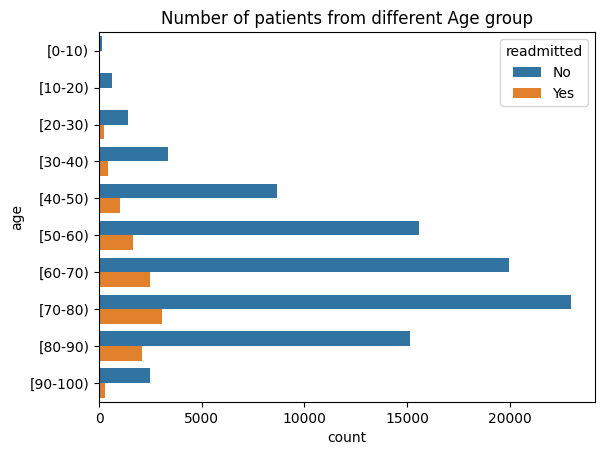

In [201]:
sns.countplot(y=df['age'],hue=df['readmitted'])
plt.title("Number of patients from different Age group")
plt.show()

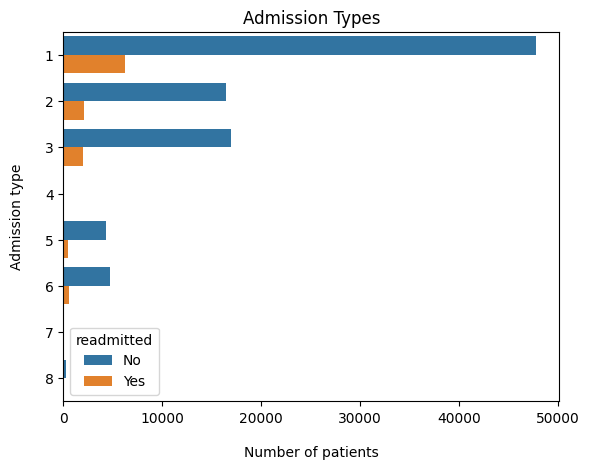

In [202]:
sns.countplot(y=df['admission_type_id'],hue=df['readmitted'])
plt.title("Admission Types")
plt.xlabel("Number of patients",labelpad=15.0)
plt.ylabel("Admission type",labelpad=15.0)
plt.show()

In [203]:
manual_mapping = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}
df['admission_type_id']=df['admission_type_id'].map(manual_mapping)
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,tolbutamide,change,diabetesMed,readmitted,medications
0,Caucasian,Female,[0-10),NaN,NULL,25,1,1,Pediatrics-Endocrinology,41,...,NaN,NaN,1,NaN,NaN,No,No,No,No,None
1,Caucasian,Female,[10-20),NaN,Emergency,1,7,3,NaN,59,...,250.01,255,9,NaN,NaN,No,Ch,Yes,No,insulin
2,AfricanAmerican,Female,[20-30),NaN,Emergency,1,7,2,NaN,11,...,250,V27,6,NaN,NaN,No,No,Yes,No,glipizide
3,Caucasian,Male,[30-40),NaN,Emergency,1,7,2,NaN,44,...,250.43,403,7,NaN,NaN,No,Ch,Yes,No,insulin
4,Caucasian,Male,[40-50),NaN,Emergency,1,7,1,NaN,51,...,157,250,5,NaN,NaN,No,Ch,Yes,No,"insulin, glipizide"


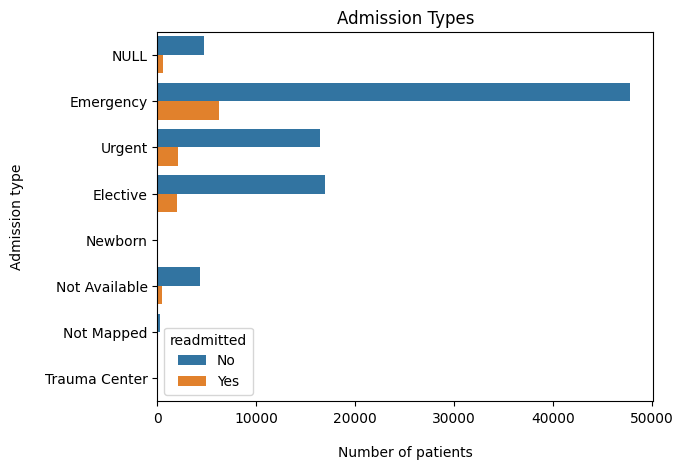

In [204]:
sns.countplot(y=df['admission_type_id'],hue=df['readmitted'])
plt.title("Admission Types")
plt.xlabel("Number of patients",labelpad=15.0)
plt.ylabel("Admission type",labelpad=15.0)
plt.show()